In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [3]:
import urllib.request
import pandas as pd
import numpy as np

urllib.request.urlretrieve('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', filename="shopping.txt")
total_data = pd.read_table('shopping.txt', names = ['ratings', 'reviews'])
print(len(total_data))

200000


In [4]:
total_data['reviews'] = total_data['reviews'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')
total_data['reviews'].replace('',np.nan, inplace=True)
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 월에 시켰는데 월일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요
9,2,인데 전문속옷브랜드 위생팬티보다 작은듯해요 불편해요 밴딩부분이 다 신축성없는 일반실...


In [5]:
reviews = []
for i in total_data['reviews']:
  reviews.append(i)

print(reviews[:5])

['배공빠르고 굿', '택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고', '아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요', '선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화했더니 바로주신다했지만 배송도 누락되어있었네요 확인안하고 바로 선물했으면 큰일날뻔했네요이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요', '민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ']


In [6]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    nouns.append(noun)
  
nouns[:10]

['배공', '굿', '택배', '이', '저희', '집', '밑', '층', '말', '바지']

In [7]:
stop_words = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [8]:
nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['배공', '굿', '택배', '저희', '집', '밑', '층', '말', '바지', '개']

In [9]:
from collections import Counter

nouns_counter = Counter(nouns)

top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'가격': 11413,
 '감사': 5178,
 '개': 8471,
 '거': 20318,
 '건': 3544,
 '것': 15454,
 '구매': 33345,
 '구입': 4367,
 '굿': 3068,
 '나': 3525,
 '냄새': 5209,
 '느낌': 3467,
 '대비': 3042,
 '데': 5151,
 '디자인': 3280,
 '때': 8390,
 '만': 3791,
 '만족': 11150,
 '맘': 4133,
 '맛': 9158,
 '반품': 4179,
 '배송': 29216,
 '번': 7467,
 '부분': 5220,
 '불편': 3992,
 '사용': 14605,
 '사이즈': 8246,
 '사진': 3343,
 '상태': 3154,
 '상품': 5641,
 '색': 2863,
 '색상': 2957,
 '생각': 11169,
 '선물': 3124,
 '수': 6842,
 '아이': 3744,
 '원': 2954,
 '일': 4452,
 '저': 3164,
 '전': 3177,
 '정도': 4171,
 '제': 3559,
 '제품': 12086,
 '주문': 10915,
 '줄': 3393,
 '중': 4169,
 '추천': 3032,
 '포장': 6985,
 '하나': 5521,
 '효과': 3218}

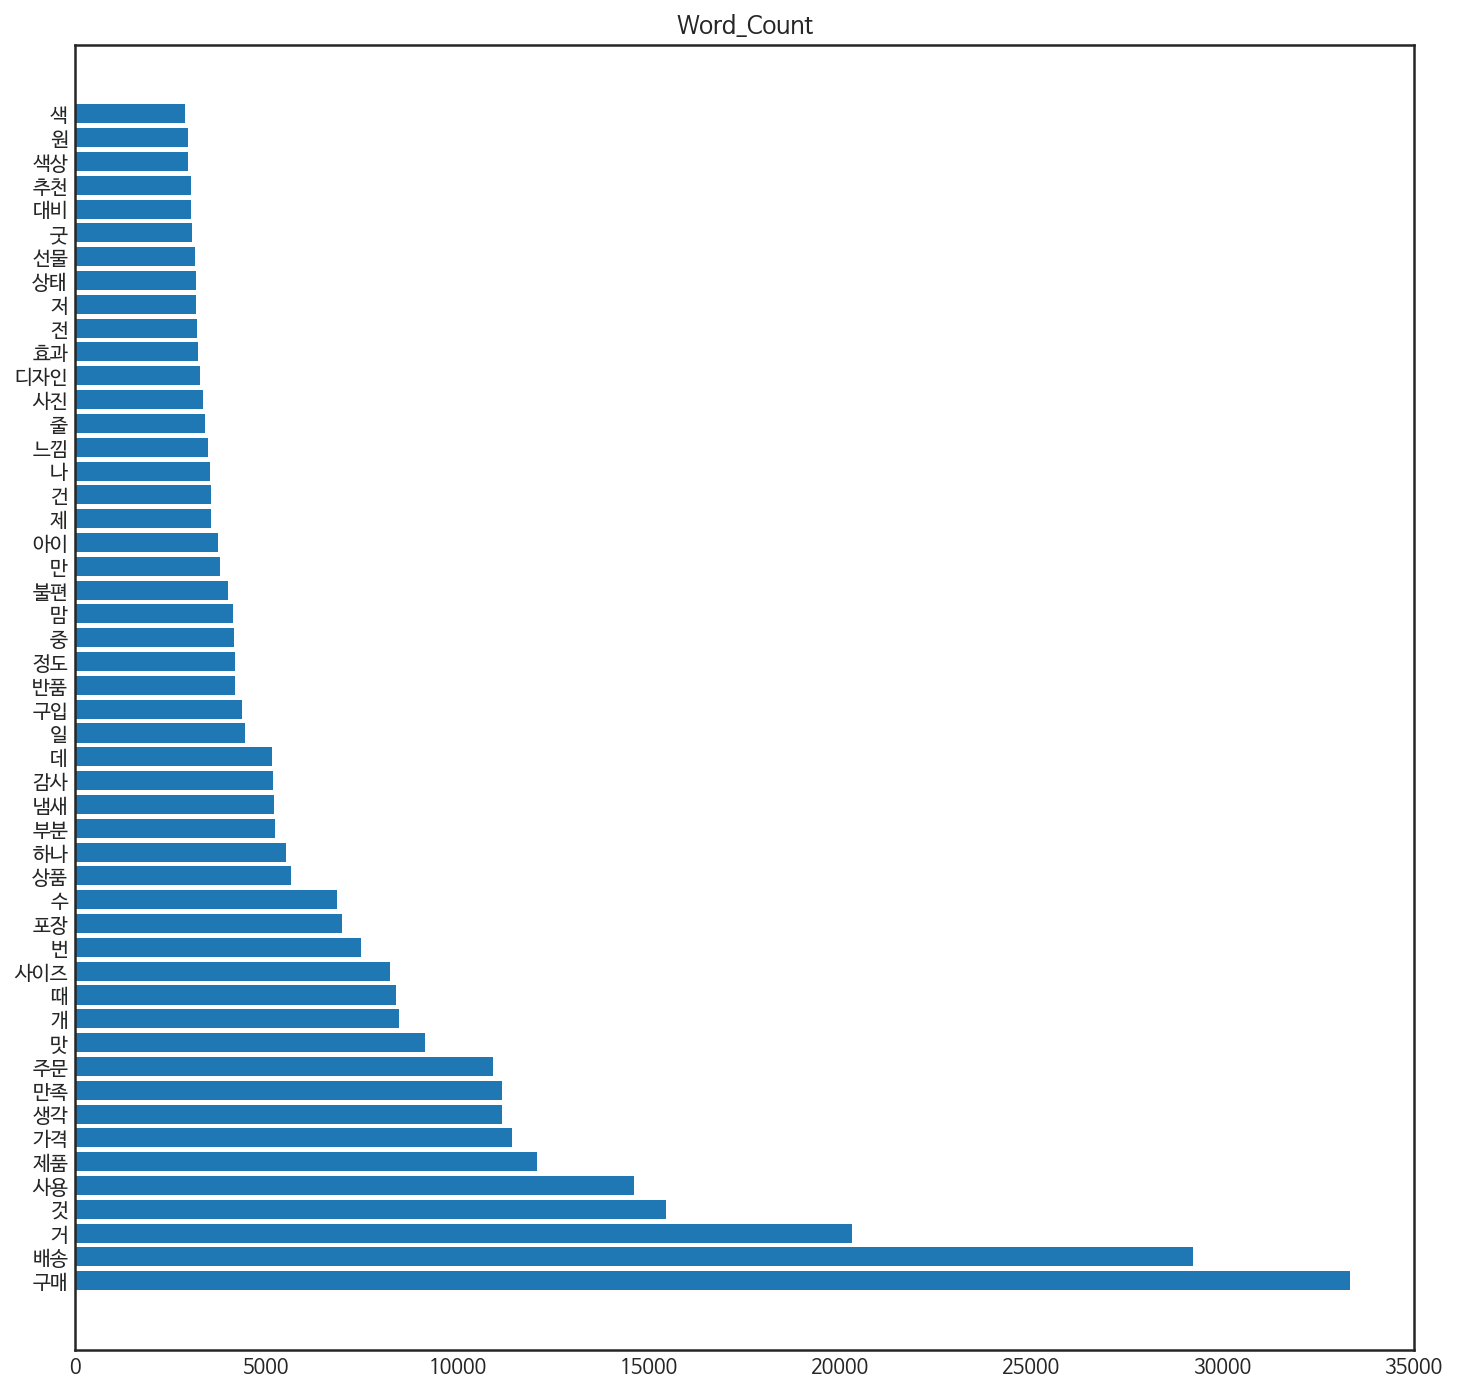

In [10]:
y_pos = np.arange(len(top_nouns))

figure = plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title("Word_Count")
plt.yticks(y_pos, top_nouns.keys())
plt.show()